In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Divya/OneDrive/Documents/spam.csv",encoding='ISO-8859-1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


 *Using head() to get top 5 rows from dataset*

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Using tail() to get last 5 rows from the dataset*

In [5]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


*Using info() to get information regarding the dataset*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.rename(columns={'v1':'Target', 'v2':'Texts'},inplace = True)

In [12]:
data

,Target,Texts
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
data.duplicated().sum()

403

In [14]:
data = data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.Target.value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

# Class Distributions


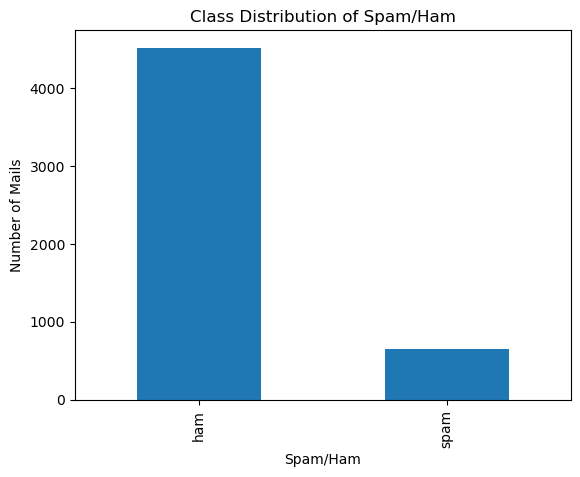

In [17]:
# Create a bar plot of the class distribution
class_counts = data['Target'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

# LABEL ENCODING- encoding categorical data i.e text data to numerical data

In [19]:
data.replace({'Target' : {'spam' : 0, 'ham' : 1}}, inplace=True)

In [20]:
data.head()

,Target,Texts
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
x = data['Texts']

In [22]:
y = data['Target']

In [23]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Texts, dtype: object

In [24]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 3)

In [27]:
x_train.head()

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
Name: Texts, dtype: object

In [28]:
x_test.head()

4994    Just looked it up and addie goes back Monday, ...
4292    You best watch what you say cause I get drunk ...
4128                 Me i'm not workin. Once i get job...
4429          Yar lor... How u noe? U used dat route too?
660     Under the sea, there lays a rock. In the rock,...
Name: Texts, dtype: object

In [29]:
y_train.head()

4443    1
982     0
3822    1
3924    1
4927    1
Name: Target, dtype: int64

In [30]:
y_test.head()

4994    1
4292    1
4128    1
4429    1
660     1
Name: Target, dtype: int64

In [31]:
# Create a TF-IDF vectorizer to convert text messages into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [32]:
# Convert the training and testing text messages into numerical features using TF-IDF
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [33]:
# Convert the target values to integers (0 and 1)
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [34]:
x_train

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Texts, Length: 4135, dtype: object

In [35]:
print(x_train_features)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

# Preparing the Model

Logistic Regression

In [36]:
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

# Model Evaluation

*Making predictions on training data and its accuracy*

In [37]:
pred_training_data = model.predict(x_train_features)

In [38]:
pred_training_data

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
accuracy_training_data = accuracy_score(y_train, pred_training_data)

In [40]:
print("Training data accuracy : ",accuracy_training_data)

Training data accuracy :  0.962273276904474


*Making predictions on testing data and its accuracy*

In [41]:
pred_testing_data = model.predict(x_test_features)
pred_testing_data

array([1, 1, 1, ..., 1, 0, 1])

In [42]:
accuracy_testing_data = accuracy_score(y_test, pred_testing_data)

In [43]:
print("Testing data accuracy : ",accuracy_testing_data)

Testing data accuracy :  0.960348162475822


# Testing the model with some custom mails

In [44]:
input_mail = ['Congratulations! You got selected for the campaign']
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
prediction

array([1])

In [45]:
if (prediction)[0] == 1:
  print("Ham Mail")
else:
  print("Spam Mail")

Ham Mail


In [46]:
input_mail = ['You have won free vacation to an exotic resort']
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
prediction

array([0])

In [47]:
if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
